In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the Dataset

heart_df = pd.read_csv('heart.csv')

In [3]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Exploratory Data Analysis :

**Target:**

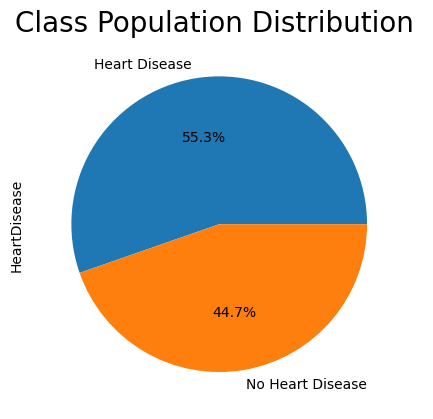

In [6]:
class_name = {'Heart Disease' : 1, 'No Heart Disease' : 0}

heart_df['HeartDisease'].value_counts().plot(kind = 'pie', autopct='%.1f%%', labels = class_name)
plt.title('Class Population Distribution ', size = 20)

plt.show()

**Age:**

<AxesSubplot:xlabel='Age', ylabel='Count'>

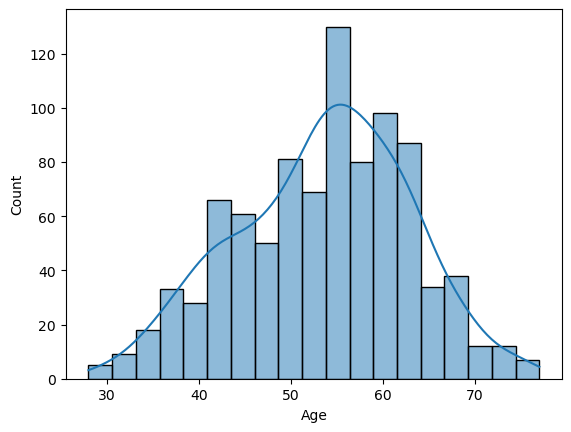

In [7]:
sns.histplot(data = heart_df['Age'], kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

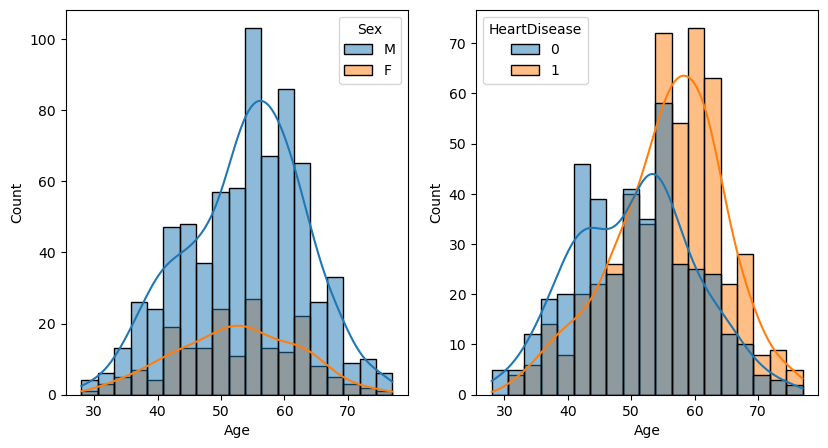

In [8]:
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 3, 2)

sns.histplot(data = heart_df, x = 'Age', kde = True, hue = 'HeartDisease')
plt.subplot(1, 3, 1)
sns.histplot(data = heart_df, x = 'Age', kde = True, hue = 'Sex')

**ChestPainType:**

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

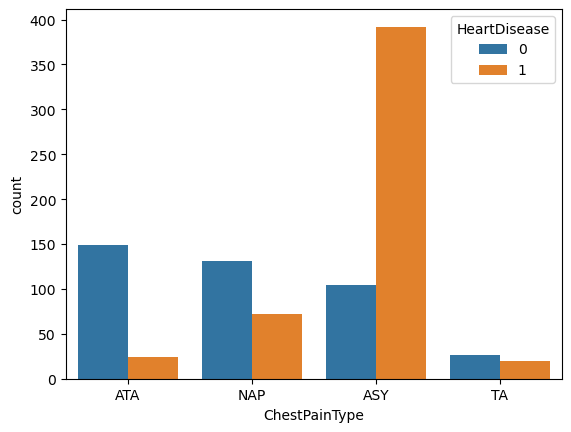

In [9]:
sns.countplot(data = heart_df, x = 'ChestPainType', hue = 'HeartDisease')

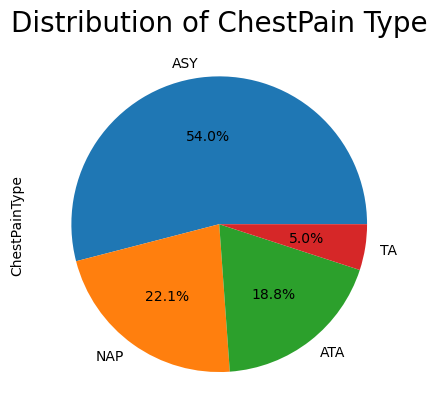

In [10]:
heart_df['ChestPainType'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title('Distribution of ChestPain Type', size = 20)

plt.show()

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

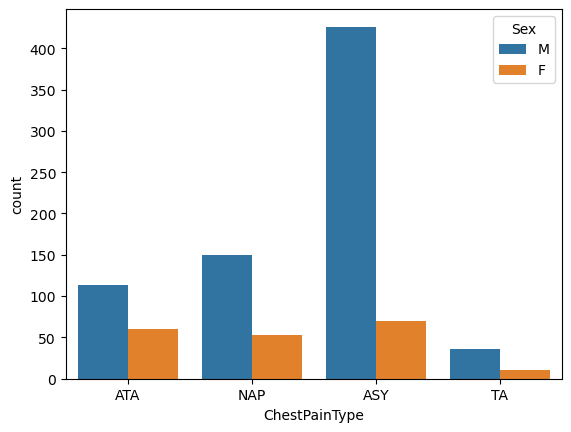

In [11]:
sns.countplot(data = heart_df, x ='ChestPainType', hue = 'Sex')

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

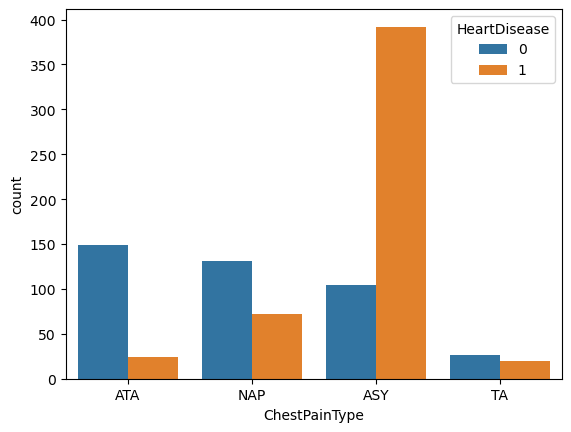

In [12]:
sns.countplot(data = heart_df, x = 'ChestPainType', hue = 'HeartDisease')

**Resting Blood Pressure:**

<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

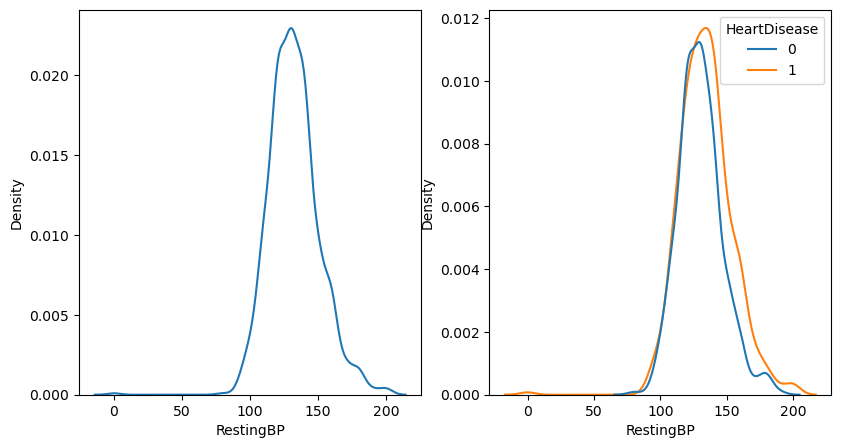

In [13]:
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 3, 2)

plt.subplot(1, 3, 1)
sns.kdeplot(heart_df['RestingBP'])

plt.subplot(1, 3, 2)
sns.kdeplot(data = heart_df, x = 'RestingBP', hue = 'HeartDisease')

**Cholesterol:**

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

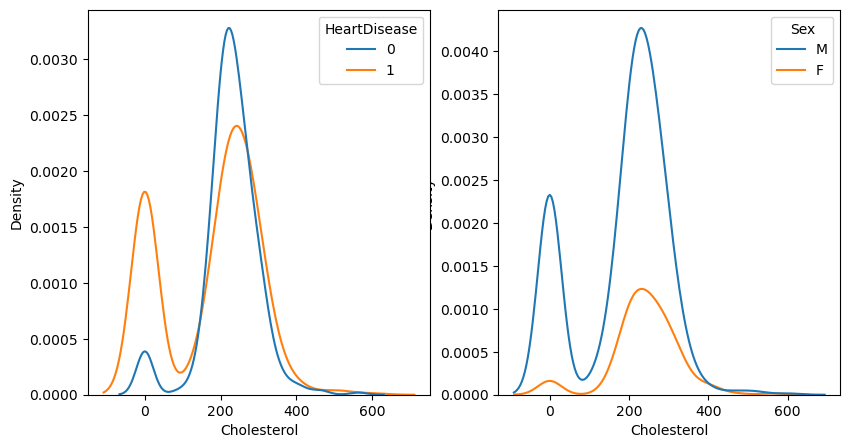

In [14]:
plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.kdeplot(data = heart_df, x = 'Cholesterol', hue = 'Sex')
plt.subplot(1, 3, 1)
sns.kdeplot(data = heart_df, x = 'Cholesterol', hue = 'HeartDisease')

**Sex:**

<AxesSubplot:xlabel='Sex', ylabel='count'>

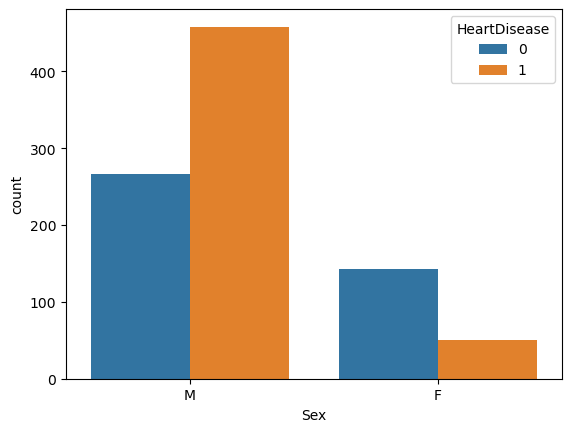

In [15]:
sns.countplot(data = heart_df, x = 'Sex', hue = 'HeartDisease')

**Fasting Blood Sugar:**

Text(0.5, 1.0, 'Distribution of Fasting Blood Sugar')

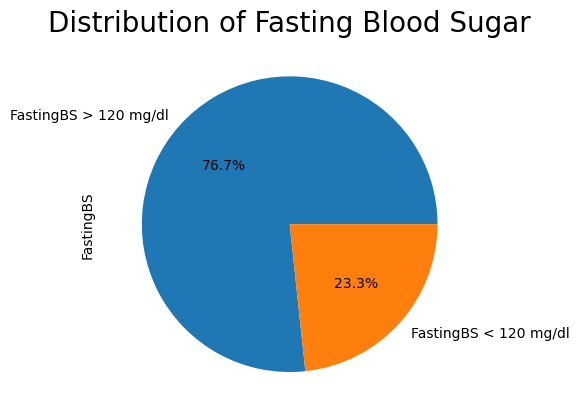

In [16]:
fast_Bs = ({'FastingBS > 120 mg/dl' : 1, 'FastingBS < 120 mg/dl' : 0})


heart_df['FastingBS'].value_counts().plot(kind = 'pie', autopct='%.1f%%', labels = fast_Bs)
plt.title('Distribution of Fasting Blood Sugar', size = 20)


**Resting ECG:**

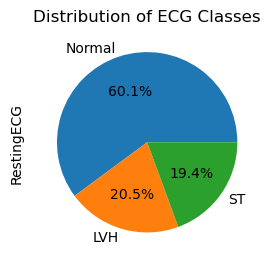

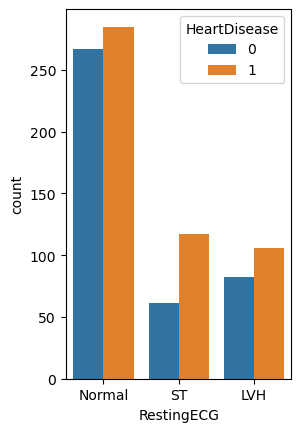

In [17]:
plt.subplot(1,2,1)

heart_df['RestingECG'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title('Distribution of ECG Classes')
plt.show()

plt.subplot(1,2,2)
sns.countplot(data = heart_df, x = 'RestingECG', hue = 'HeartDisease')
plt.show()

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

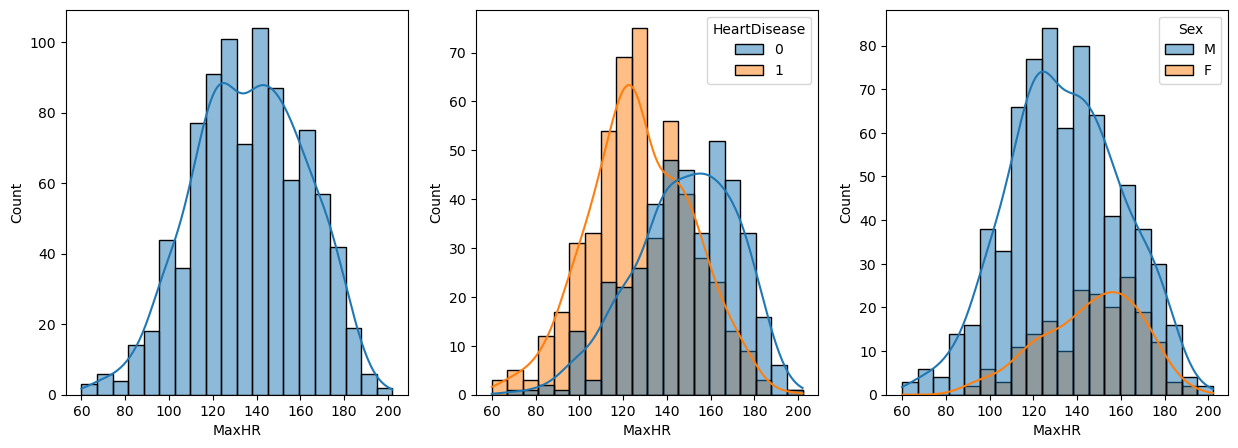

In [18]:
plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data = heart_df, x = 'MaxHR', kde = True)

plt.subplot(1, 3, 2)
sns.histplot(data = heart_df, x = 'MaxHR', hue = 'HeartDisease', kde = True)

plt.subplot(1, 3, 3)
sns.histplot(data = heart_df, x = 'MaxHR', hue = 'Sex', kde = True)

**Exercise-Induced Angina:**

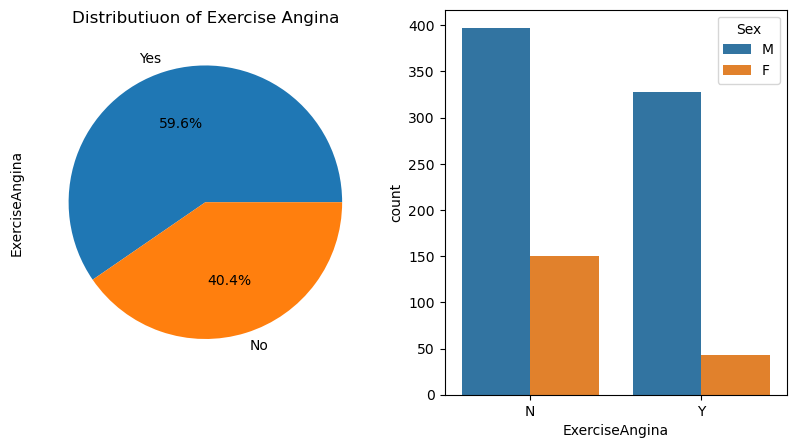

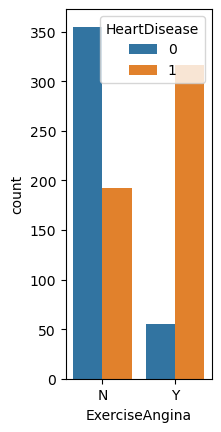

In [19]:
plt.subplots(1, 2, figsize=(15, 5))

Ang_class = ({'Yes': 'Y', 'No': 'N'})
plt.subplot(1, 3, 1)
heart_df['ExerciseAngina'].value_counts().plot(kind = 'pie', autopct='%.1f%%', labels = Ang_class)
plt.title('Distributiuon of Exercise Angina')

plt.subplot(1,3,2)
sns.countplot(data = heart_df, x = 'ExerciseAngina', hue = 'Sex')
plt.show()

plt.subplot(1,3,3)
sns.countplot(data = heart_df, x = 'ExerciseAngina', hue= 'HeartDisease')
plt.show()

**Old Peak:**

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

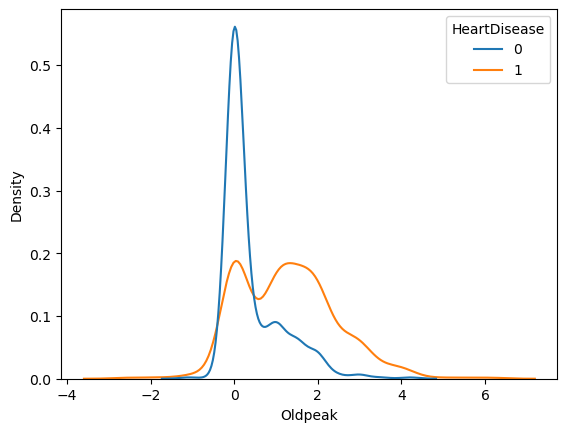

In [20]:
sns.kdeplot(data = heart_df, x = 'Oldpeak', hue = 'HeartDisease')

**ST Slope:**

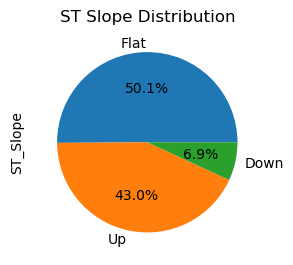

In [21]:
plt.subplot(1, 2, 1)
heart_df['ST_Slope'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.title('ST Slope Distribution')
plt.show()


**Correlation between features:**

<AxesSubplot:>

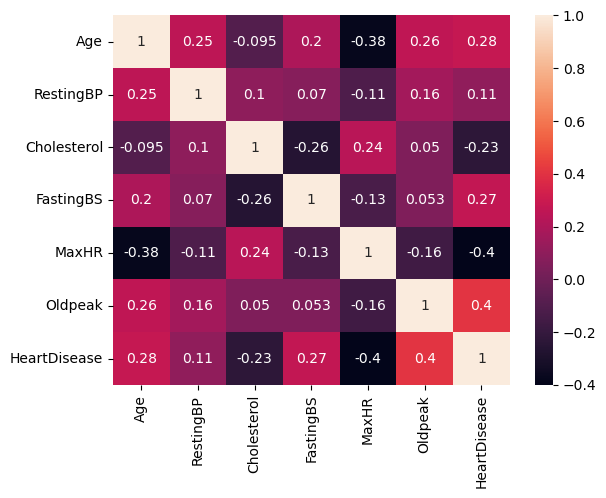

In [22]:
sns.heatmap(heart_df.corr(), annot = True)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [24]:
heart_df['Sex'] = le.fit_transform(heart_df['Sex'])
heart_df['ExerciseAngina'] = le.fit_transform(heart_df['ExerciseAngina'])

In [25]:
heart_df = pd.get_dummies(data = heart_df, columns= ['ChestPainType', 'RestingECG', 'ST_Slope'])

In [26]:
heart_df.shape

(918, 19)

In [27]:
heart_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [28]:
x = heart_df.drop('HeartDisease', axis = 1)
y = heart_df['HeartDisease']

In [29]:
x

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,0,1,0,0,1,0,0,0,1,0


In [30]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

### Train-test Split :

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 18)
(184, 18)
(734,)
(184,)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Logistic Regression :

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 123)

lr.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [35]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

### Model Evaluation :

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix  

In [37]:
def model_eval(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    cm = confusion_matrix(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [38]:
print('                    Training Report           ')
model_eval(y_pred_train, y_train)

                    Training Report           
[[277  42]
 [ 56 359]]
The accuracy of the Model is : 0.8664850136239782
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       319
           1       0.90      0.87      0.88       415

    accuracy                           0.87       734
   macro avg       0.86      0.87      0.86       734
weighted avg       0.87      0.87      0.87       734



In [39]:
print('                    Testing Report           ')
model_eval(y_pred_test, y_test)

                    Testing Report           
[[68 15]
 [ 9 92]]
The accuracy of the Model is : 0.8695652173913043
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        83
           1       0.86      0.91      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



### Decision Tree Classifier :

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 123)

dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=123)

In [41]:
y_pred_tree_train = dtree.predict(x_train)
y_pred_tree_test = dtree.predict(x_test)

### Model Evaluation :

In [42]:
print('                    Training Report           ')
model_eval(y_pred_tree_train, y_train)

                    Training Report           
[[333   0]
 [  0 401]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [43]:
print('                    Testing Report           ')
model_eval(y_pred_tree_test, y_test)

                    Testing Report           
[[64 23]
 [13 84]]
The accuracy of the Model is : 0.8043478260869565
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        87
           1       0.79      0.87      0.82        97

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



### Random Forest Classifier :

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 123)

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [45]:
y_pred_rfr_train = rf.predict(x_train)
y_pred_rfr_test = rf.predict(x_test)

### Model Evaluation :

In [46]:
print('                    Training Report           ')
model_eval(y_pred_rfr_train, y_train)

                    Training Report           
[[333   0]
 [  0 401]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [47]:
print('                    Testing Report           ')
model_eval(y_pred_rfr_test, y_test)

                    Testing Report           
[[67 12]
 [10 95]]
The accuracy of the Model is : 0.8804347826086957
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        79
           1       0.89      0.90      0.90       105

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### Naive Bayes Classifier:  

In [48]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [49]:
y_pred_naive_train = naive_bayes.predict(x_train)
y_pred_naive_test = naive_bayes.predict(x_test)

### Model Evaluation :

In [50]:
print('                    Training Report           ')
model_eval(y_pred_naive_train, y_train)

                    Training Report           
[[277  48]
 [ 56 353]]
The accuracy of the Model is : 0.8583106267029973
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       325
           1       0.88      0.86      0.87       409

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



In [51]:
print('                    Testing Report           ')
model_eval(y_pred_naive_test, y_test)

                    Testing Report           
[[68 17]
 [ 9 90]]
The accuracy of the Model is : 0.8586956521739131
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        85
           1       0.84      0.91      0.87        99

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



### AdaBoost Classifer :

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 42))
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42))

In [53]:
y_pred_ada_train = ada.predict(x_train)
y_pred_ada_test = ada.predict(x_test)

### Model Evaluation:

In [54]:
print('                    Training Report           ')
model_eval(y_pred_ada_train, y_train)

                    Training Report           
[[333   0]
 [  0 401]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [55]:
print('                    Testing Report           ')
model_eval(y_pred_ada_test, y_test)

                    Testing Report           
[[69 12]
 [ 8 95]]
The accuracy of the Model is : 0.8913043478260869
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.89      0.92      0.90       103

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



### XGBoost Classifier :

In [56]:
import xgboost

clf_xgboost = xgboost.XGBClassifier()
clf_xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
y_pred_xg_train = clf_xgboost.predict(x_train)
y_pred_xg_test = clf_xgboost.predict(x_test)

### Model Evaluation :

In [58]:
print('                    Training Report           ')
model_eval(y_train, y_pred_xg_train)

                    Training Report           
[[333   0]
 [  0 401]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [59]:
print('                    Testing Report           ')
model_eval(y_pred_xg_test, y_test)

                    Testing Report           
[[66 13]
 [11 94]]
The accuracy of the Model is : 0.8695652173913043
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        79
           1       0.88      0.90      0.89       105

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
classifiers = []

classifiers.append(LogisticRegression(random_state = 123))
classifiers.append(DecisionTreeClassifier(random_state = 42))
classifiers.append(AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state = 42)))
classifiers.append(RandomForestClassifier(random_state = 123))
classifiers.append(GaussianNB())
classifiers.append(xgboost.XGBClassifier())

In [62]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 5))

In [63]:
cv_results

[array([0.9047619 , 0.8707483 , 0.85714286, 0.82312925, 0.8630137 ]),
 array([0.73469388, 0.78911565, 0.73469388, 0.79591837, 0.81506849]),
 array([0.85714286, 0.89795918, 0.84353741, 0.86394558, 0.84246575]),
 array([0.84353741, 0.88435374, 0.85034014, 0.85034014, 0.84931507]),
 array([0.8707483 , 0.8707483 , 0.85034014, 0.82993197, 0.83561644]),
 array([0.88435374, 0.8707483 , 0.86394558, 0.82993197, 0.85616438])]

In [64]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [65]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Decision Tree Classifier', 'ADABoost Classifier','Random Forest Classifier', 'Logistic Regression', 'XGBoost Classifier', 'GaussianNB']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.863759,0.026173,Decision Tree Classifier
1,0.861029,0.018098,GaussianNB
2,0.861010,0.020189,Random Forest Classifier
3,0.855577,0.014609,Logistic Regression
4,0.851477,0.017087,XGBoost Classifier
5,0.773898,0.033122,ADABoost Classifier


### Hyperparameter Tuning :

### Decision tree Classifier :

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
dt_tuned = DecisionTreeClassifier()

In [97]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(1, 5)),
    'min_samples_split': list(np.arange(2, 24)),
    'min_samples_leaf': list(np.arange(2, 24)),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [98]:
random_search = RandomizedSearchCV(estimator = dt_tuned, param_distributions = param_dist, n_iter = 100, cv = 5,
                                  verbose = 2, n_jobs = -1)

In [99]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    max_features='sqrt',
                                                    min_samples_leaf=9,
                                                    min_samples_split=19),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20, 21, 22,
                                    

In [100]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_samples_split': 20, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


In [101]:
best_model = random_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=13, min_samples_split=20)

In [102]:
dt_tuned = DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=13, min_samples_split=20)
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=13, min_samples_split=20)

In [103]:
y_pred_dt_train = dt_tuned.predict(x_train)
y_pred_dt_test = dt_tuned.predict(x_test)

### Model Evaluation :

In [104]:
print('                    Training Report           ')
model_eval(y_pred_dt_train, y_train)

                    Training Report           
[[280  49]
 [ 53 352]]
The accuracy of the Model is : 0.8610354223433242
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       329
           1       0.88      0.87      0.87       405

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



In [105]:
print('                    Testing Report           ')
model_eval(y_pred_dt_test, y_test)

                    Testing Report           
[[69 21]
 [ 8 86]]
The accuracy of the Model is : 0.842391304347826
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        90
           1       0.80      0.91      0.86        94

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

